## Задание 2

### 42 вариант

In [35]:
from numpy import zeros, log, transpose, dot, eye, ones, array
from numpy.linalg import solve, norm
import numpy as np
from pandas import DataFrame
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [36]:
K = lambda x, s: 1/(s*x + 5)
K_1 = lambda s, t: integrate.quad(lambda x: K(x,s)*K(x,t), 0, 1)[0]

z_1 = lambda s: 1
z_2 = lambda s: s * (1 - s)

u_1 = lambda x: integrate.quad(lambda s: 1/(s*x+5), 0, 1)[0]
u_2 = lambda x: integrate.quad(lambda s: 1/(s*x+5) * s * (1 - s), 0, 1)[0]

In [4]:
def build_points(n, a=0, b=1):
    h = (b - a)/n
    points = []
    for i in range(n):
        points.append(a + i*h)
    return points, h

In [5]:
def first_method(n, alpha, u):
    points, h = build_points(n)
 
    C = zeros((n, n))
    for i in range(n):
        for j in range(n):
            C[i,j] = K(points[i], points[j]) * h
    
    U = zeros((n, 1))
    for i in range(n):
            U[i] = u(points[i])
    
    return points, solve(dot(transpose(C), C) + alpha*eye(n), dot(transpose(C), U))

In [6]:
def second_method(n, alpha, u, p, r):
    points, h = build_points(n)
    
    C = zeros((n - 2, n - 2))
    for i in range(1, n - 3):   
        for j in range(1, n - 3):
            C[i-1, j-1] = K_1(points[i], points[j]) * h

    P = zeros((n - 2, n - 2))
    for i in range(1, n - 3):
        P[i-1, i-1] =  2 * p / h ** 2 + r
        P[i-1, i - 2] = -p / h ** 2
        if i != n - 3:
            P[i-1, i] = -p / h ** 2
    P = alpha * P
    
    u_k = lambda s: integrate.quad(lambda t: K(t, s) * u(t), 0, 1)[0]
    
    U = zeros(n - 2)
    for i in range(1, n - 3):
        U[i-1] = u_k(points[i])
    
    solution = solve(dot((P + C).transpose(), P + C) + alpha*eye(n-2), dot((P + C).transpose(), U))

    return points, array([0, *solution, 0])

In [7]:
def find_error(expected, received):
    return abs(expected - received).mean()

In [40]:
table = []
alpha = 10 ** -8

for n in [50, 100, 500, 1000, 1500, 3000]:
    points, solution1 = first_method(n, alpha, u_1)
    points, solution2 = second_method(n, alpha, u_1, 1, 1)
    expected = np.array([z_1(point) for point in points]) 
    table.append([n, find_error(expected, solution1), find_error(expected, solution2)])

df = DataFrame(table, columns = ["n", "first method", "second method"])  
df

,n,first method,second method
0,50,0.029899,0.156492
1,100,0.014946,0.084154
2,500,0.002977,0.030298
3,1000,0.001492,0.025611
4,1500,0.001005,0.024271
5,3000,0.000534,0.023243


In [42]:
table = []

values = [0, 0.001, 1,  100, 1000, 10000]
n = 1000
alpha = 10 ** -8

for p in values:
    for r in values:
        points, solution = second_method(n, alpha, u_1, p, r)
        expected = np.array([z_1(point) for point in points])
        table.append([p, r, find_error(expected, solution1)])

df = DataFrame(table, columns = ["p", "r", "second method"])  
df

,p,r,second method
0,0.000,0.000,0.000534
1,0.000,0.001,0.000534
2,0.000,1.000,0.000534
3,0.000,100.000,0.000534
4,0.000,1000.000,0.000534
5,0.000,10000.000,0.000534
6,0.001,0.000,0.000534
7,0.001,0.001,0.000534
8,0.001,1.000,0.000534
9,0.001,100.000,0.000534


In [46]:
table = []

p = 1
r = 0
n = 1000

for i in range(1, -15, -1):
    alpha = 10 ** i
    points, solution1 = first_method(n, alpha, u_1)
    points, solution2 = second_method(n, alpha, u_1, p, r)
    expected = np.array([z_1(point) for point in points])
    table.append([alpha, find_error(expected, solution1), find_error(expected, solution2)])

df = DataFrame(table, columns = ["alpha", "first_method", "second method"])  
df

,alpha,first_method,second method
0,1.000000e+01,0.996370,1.000000
1,1.000000e+00,0.964846,0.999998
2,1.000000e-01,0.732998,0.999822
3,1.000000e-02,0.215804,0.985057
4,1.000000e-03,0.030834,0.619215
5,1.000000e-04,0.021003,0.096275
6,1.000000e-05,0.011680,0.028279
7,1.000000e-06,0.001112,0.025153
8,1.000000e-07,0.001245,0.025286
9,1.000000e-08,0.001492,0.025611


In [8]:
table = []

p = 1
r = 0
n = 1000

for i in range(1, -15, -1):
    alpha = 10 ** i
    points, solution1 = first_method(n, alpha, u_2)
    points, solution2 = second_method(n, alpha, u_2, p, r)
    expected = np.array([z_2(point) for point in points])
    table.append([alpha, find_error(expected, solution1), find_error(expected, solution2)])

df = DataFrame(table, columns = ["alpha", "first_method", "second method"])  
df

,alpha,first_method,second method
0,1.000000e+01,0.166063,0.166666
1,1.000000e+00,0.160879,0.166666
2,1.000000e-01,0.126270,0.166637
3,1.000000e-02,0.073969,0.164177
4,1.000000e-03,0.064999,0.103226
5,1.000000e-04,0.064296,0.058559
6,1.000000e-05,0.064172,0.063565
7,1.000000e-06,0.064179,0.063611
8,1.000000e-07,0.064196,0.063576
9,1.000000e-08,0.064428,0.063572


α =  0.1


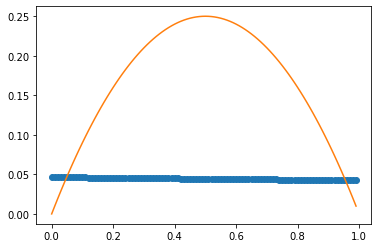

α =  1e-05


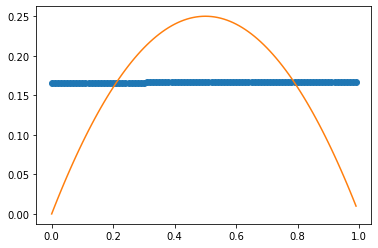

α =  1e-10


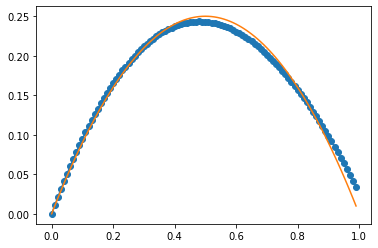

α =  1e-16


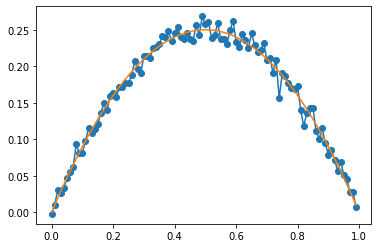

In [30]:
p = 1
r = 1
n = 100

for i in [-1, -5, -10, -16]:
    alpha = 10 ** i
    
    points, solution1 = first_method(n, alpha, u_2)
    expected = np.array([z_2(point) for point in points])
    
    print("α = ", alpha)
    
    plt.plot(points, solution1) 
    plt.scatter(points, solution1) 
    plt.plot(points, expected)  
    plt.show()

α =  0.1


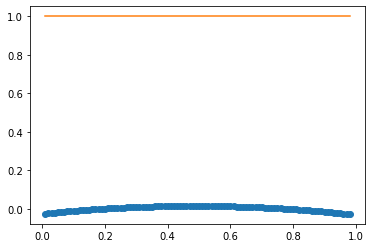

α =  1e-05


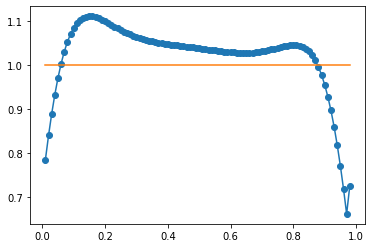

α =  1e-10


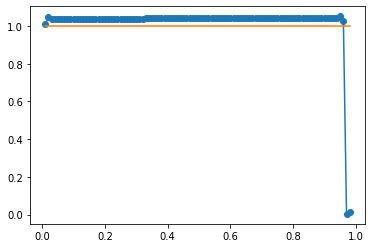

α =  1e-16


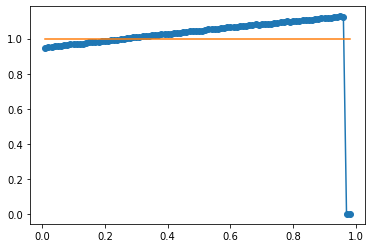

In [34]:
p = 1
r = 1
n = 100

for i in [-1, -5, -10, -16]:
    alpha = 10 ** i
    
    points, solution2 = second_method(n, alpha, u_1, p, r)
    expected = np.array([z_1(point) for point in points])
    
    print("α = ", alpha)
    
    plt.plot(points[1:-1], solution2[1:-1])
    plt.scatter(points[1:-1], solution2[1:-1])
    plt.plot(points[1:-1], expected[1:-1])  
    plt.show()